# 📘 Fine-tuned DeepSeek-OCR Evaluation & Analysis

## 1. Installation

In [ ]:
# 1. Cài đặt Unsloth & Dependencies
!pip install -q --no-deps bitsandbytes accelerate xformers peft trl triton cut_cross_entropy unsloth_zoo
!pip install -q sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" "hf_transfer"
!pip install -q --no-deps unsloth

# 2. Cài đặt Transformers & TRL đúng version yêu cầu
!pip install -q transformers==4.56.2
!pip install -q --no-deps trl==0.22.2

# 3. Thư viện hỗ trợ
!pip install -q jiwer einops addict easydict torchvision

In [2]:
import os
os.environ["UNSLOTH_WARN_UNINITIALIZED"] = '0'
# Ép buộc chỉ sử dụng 1 GPU 
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

## 2. Load fine-tuned model

In [3]:
import torch
from unsloth import FastVisionModel
from transformers import AutoModel
from peft import PeftModel
from huggingface_hub import snapshot_download

# Đường dẫn model fine-tuned
FINETUNED_PATH = "/kaggle/input/deepseek-ocr-finetuning/fine_tuned_deepseek_ocr/" 

print("🚀 Bắt đầu quy trình Load Model...")

# BƯỚC 1: Tải/Kiểm tra Model base
print("⬇️ Đang kiểm tra/tải Base Model...")
base_model_path = snapshot_download("unsloth/DeepSeek-OCR", local_dir="deepseek_ocr_base")

# BƯỚC 2: Load Base Model
print("🔄 Đang load Base Model vào VRAM...")
base_model, tokenizer = FastVisionModel.from_pretrained(
    "./deepseek_ocr_base", # Load từ folder base vừa tải
    load_in_4bit = True,
    auto_model = AutoModel,
    trust_remote_code = True,
    unsloth_force_compile = True,
    use_gradient_checkpointing = "unsloth",
    device_map = "cuda:0", 
)

# BƯỚC 3: Gắn Adapter LoRA
if os.path.exists(FINETUNED_PATH):
    print(f"🔄 Đang gắn LoRA Adapter từ: {FINETUNED_PATH}")
    try:
        # Load adapter đè lên base model
        model = PeftModel.from_pretrained(base_model, FINETUNED_PATH)
        
        # Chuyển sang chế độ Inference
        FastVisionModel.for_inference(model)
        print("✅ Đã load Model Fine-tuned thành công! Sẵn sàng sử dụng.")
        
    except Exception as e:
        print(f"❌ Lỗi khi gắn Adapter: {e}")
else:
    print(f"❌ Không tìm thấy đường dẫn: {FINETUNED_PATH}")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


2025-12-07 05:54:09.411244: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765086849.598344      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765086849.652121      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
[xformers|WARNING]WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.9.1+cu128 with CUDA 1208 (you have 2.6.0+cu124)
    Python  3.10.19 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


Switching to PyTorch attention since your Xformers is broken.

Unsloth: Xformers was not installed correctly.
Please install xformers separately first.
Then confirm if it's correctly installed by running:
python -m xformers.info

Longer error message:
xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.9.1+cu128 with CUDA 1208 (you have 2.6.0+cu124)
    Python  3.10.19 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
🦥 Unsloth Zoo will now patch everything to make training faster!
Unsloth: Could not import trl.trainer.alignprop_trainer: Failed to import trl.trainer.alignprop_trainer because of the following error (look up to see its traceback):
Failed to import trl.models.modeling_sd_base because of the following error (look up to see its traceback):
Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable

.gitattributes: 0.00B [00:00, ?B/s]

README-checkpoint.md: 0.00B [00:00, ?B/s]

LICENSE: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

assets/fig1.png:   0%|          | 0.00/396k [00:00<?, ?B/s]

assets/show1.jpg:   0%|          | 0.00/117k [00:00<?, ?B/s]

assets/show2.jpg:   0%|          | 0.00/216k [00:00<?, ?B/s]

assets/show3.jpg:   0%|          | 0.00/247k [00:00<?, ?B/s]

assets/show4.jpg:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

conversation.py: 0.00B [00:00, ?B/s]

deepencoder.py: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

processor_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


🔄 Đang load Base Model vào VRAM...
Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2025.11.6: Fast Deepseekocr patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at ./deepseek_ocr_base and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


🔄 Đang gắn LoRA Adapter từ: /kaggle/input/deepseek-ocr-finetuning/fine_tuned_deepseek_ocr/
✅ Đã load Model Fine-tuned thành công! Sẵn sàng sử dụng.


## 3. Metrics & Inference

In [4]:
import json
import jiwer
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import shutil

# Tạo thư mục tạm để model lưu kết quả debug (Tránh lỗi output_path)
OUTPUT_DIR = "/kaggle/working/eval_output"
if os.path.exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
os.makedirs(OUTPUT_DIR, exist_ok=True)

def calculate_cer(reference, hypothesis):
    """Tính Character Error Rate (CER)"""
    if not reference: return 1.0 # Nếu nhãn rỗng mà model đoán ra chữ -> sai 100%
    return jiwer.cer(reference, hypothesis)

def evaluate_dataset(jsonl_path, max_samples=None):
    print(f"📂 Đang đánh giá trên tập: {jsonl_path}")
    
    results = []
    total_cer = 0
    count = 0
    
    instruction = "<image>\nFree OCR. "
    
    # Đọc dữ liệu
    with open(jsonl_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    # Nếu muốn test nhanh thì giới hạn số mẫu
    if max_samples:
        lines = lines[:max_samples]
        
    print(f"🚀 Bắt đầu chạy Inference trên {len(lines)} mẫu...")
    
    for line in tqdm(lines):
        item = json.loads(line)
        img_path = item['image']
        # folder name
        img_folder = os.path.basename(os.path.dirname(img_path))
        # img file name
        img_name = os.path.basename(img_path)
        ground_truth = item['text']
        
        # Bỏ qua nếu ảnh không tồn tại
        if not os.path.exists(img_path): continue
        
        try:
            # Chạy model
            res = model.infer(
                tokenizer,
                prompt=instruction,
                image_file=img_path,
                output_path=OUTPUT_DIR + f"/{img_folder}/{img_name}/", 
                base_size=1024,
                image_size=640,
                crop_mode=True,
                save_results=True,
                test_compress=False
            )
            
            # Lấy text dự đoán
            prediction = ""
            with open(OUTPUT_DIR + f"/{img_folder}/{img_name}/result.mmd", 'r', encoding='utf-8') as f:
                for line in f:
                    prediction = line.strip()
                    break
                    
            
            # Tính CER
            cer = calculate_cer(ground_truth, prediction)
            total_cer += cer
            count += 1
            
            # Lưu kết quả để phân tích sau
            results.append({
                "image": img_path,
                "ground_truth": ground_truth,
                "prediction": prediction,
                "cer": cer
            })
            
        except Exception as e:
            print(f"⚠️ Lỗi mẫu {img_path}: {e}")
            
    # Tổng hợp
    avg_cer = total_cer / count if count > 0 else 0
    print(f"\n{'='*40}")
    print(f"📊 KẾT QUẢ ĐÁNH GIÁ (Trên {count} mẫu)")
    print(f"🎯 Average CER: {avg_cer:.4f} (Thấp hơn là tốt hơn)")
    print(f"   - Tức là sai khoảng {avg_cer*100:.2f}% số ký tự")
    print(f"{'='*40}\n")
    
    return pd.DataFrame(results)

print("✅ Đã chuẩn bị hàm đánh giá")

✅ Đã chuẩn bị hàm đánh giá


### Run evaluation

In [5]:
# Đường dẫn file Test 
TEST_FILE = "/kaggle/input/uit-hwdb/test_line.jsonl"

# Chạy đánh giá 
if os.path.exists(TEST_FILE):
    df_results = evaluate_dataset(TEST_FILE, max_samples=None) 
    
    # Lưu kết quả ra CSV để làm báo cáo
    df_results.to_csv("paragraph_evaluation_results.csv", index=False)
    print("💾 Đã lưu bảng kết quả chi tiết vào 'paragraph_evaluation_results.csv'")
else:
    print(f"⚠️ Không tìm thấy file {TEST_FILE}")

📂 Đang đánh giá trên tập: /kaggle/input/uit-hwdb/test_line.jsonl
🚀 Bắt đầu chạy Inference trên 201 mẫu...


  0%|          | 0/201 [00:00<?, ?it/s]The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Việc tiếp việc anh Trương Xuân Đại. Ngày tự khí, tôi bảo " có gì phải của
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  0%|          | 1/201 [00:17<57:27, 17.24s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
những người mới lên sự thật " phát hành, nhân làm đạo đất bằng tố cáo, chia sẻ,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  1%|          | 2/201 [00:25<39:02, 11.77s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ứng hộ anh Trương Xuân Đại. Mặt bом đạc 6,7 tuổi ở Q.1, tiền " gửi " tông anh Trương
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  1%|▏         | 3/201 [00:34<34:43, 10.52s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xuân Đại 150.000 đồng, một số người trên thùng ở Tân Bình gửi tổng 100.000 đ,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  2%|▏         | 4/201 [00:42<31:02,  9.45s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
một thanh niên tên Hà đến quận 200.000. Sau đó mua là bảy,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  2%|▏         | 5/201 [00:48<27:23,  8.39s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nhiều bản địa các phố đến bây giờ chỉ có cưng hồ.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  3%|▎         | 6/201 [00:54<24:47,  7.63s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Ban liên lạc báo " tuổi " từ cùng quyền định giá tổng nhanh công nhân
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  3%|▎         | 7/201 [01:01<23:46,  7.35s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đến tốc độ tiến cực ở đường liên cảng A5 10 tuần đông. Đáng, để nghiên cứu
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  4%|▍         | 8/201 [01:09<24:10,  7.52s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đặc cuộc cho niềm tin! Qua bốn chị, bạn thân tôi đã kiệt về với tôi là những
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  4%|▍         | 9/201 [01:16<24:08,  7.55s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Đại phạm của công trình đường liên cảng A5 mang năm trước đây, nhưng nay
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  5%|▍         | 10/201 [01:23<22:50,  7.18s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
mái biệt " việc làm chúng còi và tốt đẹp đã mang đến bao bì lòng phận, phục
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  5%|▌         | 11/201 [01:31<23:26,  7.40s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cho người sống mà, những người mà " chơi sôi vù " cũng không đảm bảo sự đón
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  6%|▌         | 12/201 [01:39<23:42,  7.52s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([3, 100, 1280])
hẹn không rõ.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  6%|▋         | 13/201 [01:44<22:03,  7.04s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Thế nhưng những hiệp nụ áy gì ra sao? Ngoài thì bây thang, phẫu bày, kể như
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  7%|▋         | 14/201 [01:53<22:57,  7.37s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
" có bố? Hệ thứ cấp và tầm co chừng, đó chỉ để lượm ve chai, phải là tù công
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  7%|▋         | 15/201 [02:01<23:34,  7.60s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
những con thật loạn bị ngây gan ngày. Ngồi nơi môi trường, chật ống lệ phải chạm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  8%|▊         | 16/201 [02:09<23:55,  7.76s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tôi sinh thế trời lưu những con người ấy đã bị dây xuống đáy cùng con ít cái,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  8%|▊         | 17/201 [02:17<23:54,  7.80s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
công! Cũng may mà anh Đan đã những hiếu, đó chắc là niềm cãi vùi
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  9%|▉         | 18/201 [02:24<23:02,  7.56s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
là những định đã mở ra các động nguyện, người chôn lên rộng ra
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
  9%|▉         | 19/201 [02:30<21:36,  7.13s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
anh không dân Đà lòng việc thay điểm giảm tín từ lý kịp mà mình
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 10%|▉         | 20/201 [02:37<21:08,  7.01s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Lại mưa, khi thành tạo dãi xác định sự phồm sự không xử lý mà ít người
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 10%|█         | 21/201 [02:44<21:30,  7.17s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
lên ngày cận vậy? Về khám, phải là người xong lính trực chuyện mâm mường
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 11%|█         | 22/201 [02:51<21:28,  7.20s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
có thể hình dung ông như điên bản lấy A5 chắc không phải vụ hoại động viên,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 11%|█▏        | 23/201 [02:58<21:15,  7.17s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cả 6 nhà đầu tư trong khu địa cấu tầm Tân Phương. Với tư thấp khẩu khối phức nguy
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 12%|█▏        | 24/201 [03:08<22:52,  7.75s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
mà còn dễ có đứa trong xã, cộng với nhân, có phải gặp thiếu người
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 12%|█▏        | 25/201 [03:15<22:42,  7.74s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
bán xã / tỉnh mà tuyến đều đều của Châu Phú ở huy không 1 nữ vùng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 13%|█▎        | 26/201 [03:22<22:00,  7.55s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tùy nghĩa và việc mà ít bao nhiêu vợ chồi bán việc và cả thiện vụ của
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 13%|█▎        | 27/201 [03:30<22:05,  7.62s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([7, 100, 1280])
của người lao động - đồng bộ - hộ nghèo).
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 14%|█▍        | 28/201 [03:36<20:03,  6.96s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Chúng tôi có buồn nghiêm và tiêu chuẩn chuyên nhưng việc làm lại của công nhân
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 14%|█▍        | 29/201 [03:43<20:00,  6.98s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
xây dựng băng với " đi mỗi xóm phồn cả gái phạm của công trình đường
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 15%|█▍        | 30/201 [03:49<19:43,  6.92s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Hơn vòng 45 ", nhưng thất bại không có hình thành người vì chính
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 15%|█▌        | 31/201 [03:55<18:49,  6.64s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đường Chi cũ hơn vải anh Đại vứt mâm, đá, nghép, kẹt, sắt, ống, ing,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 16%|█▌        | 32/201 [04:04<20:05,  7.13s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
những dòng tham (đã có muốn mua) và có liên phòng hiện biến khối phục
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 16%|█▋        | 33/201 [04:11<19:50,  7.09s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
những bài làm " đỏ " có như vậy muốn gìn văn " cứ phê trấn " để khẳng định
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 17%|█▋        | 34/201 [04:18<19:58,  7.18s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cả người dân sẽ không còn nhà đợi được cho cuối kinh doanh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 17%|█▋        | 35/201 [04:24<18:58,  6.86s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Phân tắc này còn chuyện không không? Kham công nhận chứng làm ý góp
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 18%|█▊        | 36/201 [04:30<18:25,  6.70s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
20 người Vũng Mã hầu như nạn chế lây hại hết. Chỉ 1 mình Đại vấn hết
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 18%|█▊        | 37/201 [04:38<19:16,  7.05s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
người NH3. Thân phận, luật ngày càng họ đi tiếp và đấu mưa ngoài cũng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 19%|█▉        | 38/201 [04:46<19:37,  7.22s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
như làm chai lòng bình phí họ đã xả thân vì khi người dân đi vào ý tư thì
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 19%|█▉        | 39/201 [04:54<19:46,  7.32s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
vợ con bố lớn thấy ngượng, lặn vào cảnh đầu banh như thế nào. Vì họ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 20%|█▉        | 40/201 [05:01<19:41,  7.34s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
để bán được được Bạc nậu tận nạn, Chốc Hải đã hỏng trêm nguyện khi
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 20%|██        | 41/201 [05:08<19:44,  7.40s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
căn hẳn do lũ cầu " đo hoàn tất " vì người tháng bám bốt dự kiến sẽ chôn
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 21%|██        | 42/201 [05:16<20:06,  7.59s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([3, 100, 1280])
chơi, ngôn ngữ.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 21%|██▏       | 43/201 [05:20<16:38,  6.32s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
và bám này, chúng ta cũng còn hồi sẵn hằng véc chiều mới nhìn.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 22%|██▏       | 44/201 [05:27<17:21,  6.63s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Thứ trưởng Bộ Tài nguyên và môi trường Đặng Hùng Võ đã đề xuất
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 22%|██▏       | 45/201 [05:34<17:20,  6.67s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
có thể " khuyến khích nhà đầu tư thỏa thuận với người sử đất để nhận
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 23%|██▎       | 46/201 [05:41<17:23,  6.73s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chuyển những hoặc thực quyền sử dụng đất, nhận góp vốn bằng quyền sử
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 23%|██▎       | 47/201 [05:48<17:28,  6.81s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
dung đất... " Nhưng tại hội nghị hôm qua, tiếng nói từ các sở tài nguyên
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 24%|██▍       | 48/201 [05:55<17:34,  6.89s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
và môi trường lạnh tiên hành " toạ bố " điều khiến người nói chối đi thảo.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 24%|██▍       | 49/201 [06:03<18:02,  7.12s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
giám đốc Sở Tài nguyên và môi trường Hải Phòng Chương Minh Tuấn cho
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 25%|██▍       | 50/201 [06:09<17:24,  6.92s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
biết thành phố cảng đứng ở dựng cơ chế " đoá thuận " trong một số
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 25%|██▌       | 51/201 [06:15<16:53,  6.76s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
rất ít trường hợp, vậy mà đã gây phản ứng với Theo kiểu đầy chuyện thì
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 26%|██▌       | 52/201 [06:22<16:51,  6.79s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
mạnh : anh này nhận tiền rồi quay lại đòi nữa, anh lựa theo thuốc
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 26%|██▋       | 53/201 [06:29<17:03,  6.91s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
xong quay ra đòi thoă thuẫn lại...
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 27%|██▋       | 54/201 [06:34<15:11,  6.20s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chưa kể để doanh nghiệp và người dân " nói chuyện " với nhau như
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 27%|██▋       | 55/201 [06:40<15:11,  6.24s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
vậy, quyền của cơ quan quản lý nhà nước sẽ mất đi ". Tôi cũng có vụ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 28%|██▊       | 56/201 [06:48<15:45,  6.52s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nghề như đường chỉ " Bỏ được qui định này đi thì tốt. Cũng một lúc chúng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 28%|██▊       | 57/201 [06:54<15:33,  6.48s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ta thực hiện hai cơ chế (vừa nhà nước thực hiện thu hồi đất nhị cách
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 29%|██▉       | 58/201 [07:01<15:56,  6.69s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
làm nay, vừa khuyến khích các nhà đầu tư thỏa thuận với người sử dụng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 29%|██▉       | 59/201 [07:08<16:00,  6.77s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đất) thì phức tạp - ông Trịnh Kiên Đĩnh, phó giám đốc Sở Tài
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 30%|██▉       | 60/201 [07:15<16:12,  6.90s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nguyệt - mới được vụ nhà đã Hà Nội, lên tiếng.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 30%|███       | 61/201 [07:21<15:31,  6.65s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Báo Về Lập Thường Của Cơ quan Hải đạo, Thứ trưởng Đặng Hùng Võ khẳng định
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 31%|███       | 62/201 [07:29<16:15,  7.02s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
" trường hợp nhà đầu tư có nhu cầu thỏa thuận với người đang nở dựng đất, chứng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 31%|███▏      | 63/201 [07:37<16:37,  7.23s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ta cần khuyến khích từ Nhà nước chăng mất cơi gì cả ". Ông Võ " kiêu gỗ " :
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 32%|███▏      | 64/201 [07:45<17:03,  7.47s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chúng ta cần thay đổi trong quan điểm, không nên để hệ thống hành chính
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 32%|███▏      | 65/201 [07:51<15:58,  7.05s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Ôm về mình khiêu quả, bởi ôm căng nhiều thì sai căng nhiều. Bộ trưởng Mai
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 33%|███▎      | 66/201 [07:59<16:10,  7.19s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Ái Trực tiếp lại : Các nước đều ép dụng có chủ tư thoại thông khí thu hồi
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 33%|███▎      | 67/201 [08:06<15:57,  7.15s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
đạt.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 34%|███▍      | 68/201 [08:08<12:51,  5.80s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Ngay cả trường hợp ta không qui định, người dân và doanh nghiệp vẫn thực hiện
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 34%|███▍      | 69/201 [08:15<13:16,  6.03s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cơ chế này. " Nếu cứ dùng quyền lực hành chính nhà nước với mô hình khóm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 35%|███▍      | 70/201 [08:22<14:02,  6.43s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cũng, người dân sẽ kêu " ông Trực nói. Chiếm " bố " - " con ". Phó Giám đốc
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 35%|███▌      | 71/201 [08:30<15:06,  6.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Sở Tài nguyên - môi trường & nhà đầu tư Nội Thành Kiên Giang đề nghị điều tra ngành : thẩm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 36%|███▌      | 72/201 [08:38<15:38,  7.28s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
quyền hạn lợi đất, giao đất phải được thảo luận theo tinh thần " song lối báo trầm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 36%|███▋      | 73/201 [08:47<16:12,  7.60s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Đông còn " theo đò, UBND cấp tỉnh, thành phố được quyền thu hồi, giao đất
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 37%|███▋      | 74/201 [08:54<16:08,  7.62s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thực thẩm quyền của UBND cấp quận, huyện (thay vì tù thứ hiện nay,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 37%|███▋      | 75/201 [09:02<15:53,  7.57s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
" ống bể " nước sản đầy vậy phải thông báo cho " ông con " thực hiện, vừa nhiêu
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 38%|███▊      | 76/201 [09:10<16:08,  7.75s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
khó vừa không thể hiện hướng đi các cách thủ tục hành chính).
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 38%|███▊      | 77/201 [09:16<14:59,  7.25s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Lập tức Thứ trưởng Đặng Hùng Võ phân công : " Ông bố có quyền của " ông bố ",
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 39%|███▉      | 78/201 [09:24<15:26,  7.53s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
" ông còn có quyền của " ông con ". Lượt không cho phép " ông bố " làm thay " ông
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 39%|███▉      | 79/201 [09:32<15:22,  7.56s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
con ". Trường hợp nào làm thay là phạm luật, chỉ có điều kiện này sẽ công
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 40%|███▉      | 80/201 [09:38<14:26,  7.16s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
còn " không dám kiều mà thôi! ".
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 40%|████      | 81/201 [09:42<12:30,  6.26s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
KHÁI QUÁT VỀ BIỂN ĐẢO VIỆT NAM
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 41%|████      | 82/201 [09:48<12:12,  6.16s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Nước ta giáp với biển Đông ở hai phía Đông và Nam. Vùng biển Việt Nam
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 41%|████▏     | 83/201 [09:55<12:16,  6.24s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
là một phần biển Đông.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 42%|████▏     | 84/201 [09:58<10:27,  5.37s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Bờ biển dài 3.280 km, từ Quảng Ninh đến Kiên Giang. Nhờ vậy cứ 100 km2
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 42%|████▏     | 85/201 [10:06<11:38,  6.02s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thì có 1 km bờ biển (trung bình của thế giới là 600 km2 đất liền / 1 km bờ biển).
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 43%|████▎     | 86/201 [10:14<12:53,  6.72s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Biển có vùng nội thủy, lãnh hải, vùng đặc quyền kinh tế và thềm lục địa với
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 43%|████▎     | 87/201 [10:22<13:40,  7.20s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
liên tách trên 1 triệu km2 (gấp 3 diện tích đất liền : 1 triệu km2)
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 44%|████▍     | 88/201 [10:29<13:27,  7.15s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([3, 100, 1280])
300.000 km2
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 44%|████▍     | 89/201 [10:32<10:54,  5.84s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Trong đó có 2 quần đảo Hoàng Sa, 2 trường Sa và 2.577 đảo lớn, nhỏ,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 45%|████▍     | 90/201 [10:40<11:48,  6.38s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
gần và xa bờ, hợp thành phòng tuyến bảo vệ, kiểm soát và làm chủ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 45%|████▌     | 91/201 [10:46<11:52,  6.48s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
một biển.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 46%|████▌     | 92/201 [10:49<09:54,  5.46s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Cả vị trí chiến lược quan trọng : nối liền với hai Bình Dương với Ấn Độ Dương,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 46%|████▋     | 93/201 [10:57<11:03,  6.14s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
châu Á với châu Âu, châu Úc với Trung Đông. Giao lưu quốc tế thuận
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 47%|████▋     | 94/201 [11:04<11:31,  6.46s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
lời, phát triển ngành biển.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 47%|████▋     | 95/201 [11:08<10:04,  5.70s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Có khí hậu biển là vùng nhiệt đới tạo điều kiện cho sinh vật biển phát
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 48%|████▊     | 96/201 [11:15<10:38,  6.08s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([3, 100, 1280])
triển, tồn tại tốt.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 48%|████▊     | 97/201 [11:19<09:12,  5.31s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Có tài nguyên sinh vật và khoáng sản phong phú, đa dạng, quý hiếm.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 49%|████▉     | 98/201 [11:26<09:50,  5.73s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Vùng biển và hải đảo nước ta có vị trí chiến lược hết sức to lớn, có ảnh hưởng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 49%|████▉     | 99/201 [11:34<11:03,  6.50s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
trực tiếp đến sự nghiệp bảo vệ nền độc lập dân tộc và xây dựng chủ nghĩa
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 50%|████▉     | 100/201 [11:42<11:42,  6.95s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
xã Hội, có liên quan trực tiếp đến sự phồn vinh của đất nước, đến văn
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 50%|█████     | 101/201 [11:49<11:37,  6.97s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([7, 100, 1280])
mình và hạnh phúc của nhân dân.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 51%|█████     | 102/201 [11:53<10:14,  6.21s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Chương trình hành động thực hiện Nghị quyết trung ương 9 - khóa
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 51%|█████     | 103/201 [12:00<10:10,  6.22s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
IX của Đảng bộ TP.HCM về xây dựng Đảng : tiếp tục chỉ đạo mạnh,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 52%|█████▏    | 104/201 [12:06<10:19,  6.39s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
mê, có hiệu quả cuộc vận động xây dựng chính đối với Đảng theo tinh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 52%|█████▏    | 105/201 [12:13<10:29,  6.56s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thẩm nghị quyết trung ương 6 (lần 2). Theo đó, tiếp tục thực hiện việc
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 53%|█████▎    | 106/201 [12:21<10:51,  6.86s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
lệ khai nhà đất và cơ sở xin vượt hinh doanh của cán bộ - công chức.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 53%|█████▎    | 107/201 [12:28<11:00,  7.02s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tăng cường thanh niên tra những nơi có dấu hiệu vi phạm, đặc biệt
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 54%|█████▎    | 108/201 [12:35<10:43,  6.92s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
trong linh vực đất đai và các công trình trọng điểm.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 54%|█████▍    | 109/201 [12:40<09:51,  6.43s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xử lý nghiêm minh theo pháp luật và kỷ luật của Đảng những người
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 55%|█████▍    | 110/201 [12:46<09:41,  6.39s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
có hành vi sai trái và những người bao che. Thực hiện tốt các quy định,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 55%|█████▌    | 111/201 [12:53<09:36,  6.40s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đối với văn bản bộ lãnh đạo, quản lý đã xảy ra chậm những tiêu cực ở cả
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 56%|█████▌    | 112/201 [13:01<10:12,  6.88s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
quan, đơn vị. Hiện toàn và tăng cường việc chiến đấu của tổ chức
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 56%|█████▌    | 113/201 [13:08<10:08,  6.92s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cơ sở Đảng. Tiếp tục đổi mới và nâng cao công tác cán bộ. Tiếp tục
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 57%|█████▋    | 114/201 [13:15<10:09,  7.00s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tôi mới phường thức lánh đạo của cấp ủy Đảng theo phương châm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 57%|█████▋    | 115/201 [13:21<09:40,  6.75s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
hướng mạnh về cổ sới.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 58%|█████▊    | 116/201 [13:25<08:22,  5.91s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Về cái cách hành chính : Tập trung chẩn chính mạnh hơn nữa từ cương
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 58%|█████▊    | 117/201 [13:32<08:44,  6.25s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
kỷ luật trọng bộ máy hành chính, nâng cao trình thẩm thấu nhiệm và
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 59%|█████▊    | 118/201 [13:39<08:57,  6.47s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ý thuộc kỷ luật của CĐ - CC, nhất là trên lĩnh vực nhà đất, đầu tư,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 59%|█████▉    | 119/201 [13:47<09:12,  6.73s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tinh doanh, trật tự xây dựng và giải quyết khiếu nại, tổ cáo.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 60%|█████▉    | 120/201 [13:53<09:04,  6.72s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xây dựng hoàn thiện hệ thống các quy trình thủ tục hành chính.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 60%|██████    | 121/201 [14:00<08:45,  6.56s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
Kiến quyết chẩn chính bộ máy hành chính các cấp, nhanh chóng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 61%|██████    | 122/201 [14:06<08:40,  6.59s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
khác phục tinh trọng quan liêu, cửa quyền, khách tiếp
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 61%|██████    | 123/201 [14:12<08:16,  6.37s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xây dựng và phát triển địa bàn ngoại CB - CC có chất lượng chuyên môn
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 62%|██████▏   | 124/201 [14:19<08:17,  6.47s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cao, có phần chất, đạo đức. Kiểm tra, xử lý hiện quyết các vụ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 62%|██████▏   | 125/201 [14:25<08:16,  6.54s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tham nhũng, lặng phí, làm chất thoát tại sân nhà nước... Về kinh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 63%|██████▎   | 126/201 [14:32<08:09,  6.53s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tế : Tập trung mọi nỗ lực nhằm đưa gỗ sản xuất sinh doanh,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 63%|██████▎   | 127/201 [14:39<08:10,  6.63s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
dựa trên tổng trưởng QLĐ trên địa bàn TP đạt 12% năm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 64%|██████▎   | 128/201 [14:45<08:02,  6.61s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
2004 và trên 12% năm 2005. Thật triển nhưng các ngành dịch vụ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 64%|██████▍   | 129/201 [14:52<07:47,  6.49s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
tài cầu trực cải ngành công nghiệp.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 65%|██████▍   | 130/201 [14:56<06:58,  5.89s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Tiếp tục nhân rộng các mỏ hình huy động vốn đầu tư. Tập trung khả
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 65%|██████▌   | 131/201 [15:03<07:08,  6.12s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thác các nguồn vốn cho ngân sách. Tổng kết quá trình cổ phần hóa
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 66%|██████▌   | 132/201 [15:09<07:14,  6.29s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
doanh nghiệp nhà nước và việc tổ chức sắp xếp lại doanh nghiệp nhà
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 66%|██████▌   | 133/201 [15:16<07:23,  6.52s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nước. Triển khai quyết định của TP về một số chính sách ưu đãi
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 67%|██████▋   | 134/201 [15:23<07:13,  6.48s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
đối với các dự án cơ sở đầu tư nước ngoài. Hai sách lâu chương
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 67%|██████▋   | 135/201 [15:29<07:07,  6.47s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tành hội nhập kinh tế của TP. Về văn hoá - xã hội : đẩy năng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 68%|██████▊   | 136/201 [15:36<07:14,  6.69s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cả hội hoặc, phát triển xã hội học tập, sự tiên tiến tại nguồn
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 68%|██████▊   | 137/201 [15:43<07:10,  6.73s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
sạch cho giá áo dục - đào tạo.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 69%|██████▊   | 138/201 [15:48<06:20,  6.03s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Nàng cao nặng lúc quân lý nhà nước trên các lĩnh vực kinh doanh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 69%|██████▉   | 139/201 [15:54<06:23,  6.18s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
dịch vụ vẫn hoa; khẩn phước những cơ hội, tiêu cực trong quản lý,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 70%|██████▉   | 140/201 [16:02<06:38,  6.53s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
và hoạt động văn hoá. Tiếp tục tập trung nguồn lực cho chương
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 70%|███████   | 141/201 [16:08<06:31,  6.53s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([4, 100, 1280])
tỉnh ở giảm...
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 71%|███████   | 142/201 [16:11<05:27,  5.55s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
BẢN CHẤT CỦA THÀNH CÔNG
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 71%|███████   | 143/201 [16:16<05:10,  5.36s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thể báo gốc ban tử hỏi thành công là gì mà bao kẻ bỏ cả cuộc đời mình theo đuổi? Phải chăng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 72%|███████▏  | 144/201 [16:25<06:00,  6.33s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đã là kết quả hoàn hảo trong công việc, sự chính xác đến từng chi tiết? Hay đó là cách nói
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 72%|███████▏  | 145/201 [16:33<06:24,  6.87s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
khác của từ thành đạt, nghĩa là có được cuộc sống giàu sang, đặc nơi người nể phục?
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 73%|███████▎  | 146/201 [16:41<06:32,  7.14s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Vậy thì bạn hãy dành chút thời gian để lặng mình suy ngẫm.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 73%|███████▎  | 147/201 [16:47<06:13,  6.91s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Giực rộng sẽ chỉ cho bạn có những người thành đạt thành công theo một cách giản dị đến bất
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 74%|███████▎  | 148/201 [16:54<05:59,  6.79s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ngờ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 74%|███████▍  | 149/201 [16:56<04:49,  5.58s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Thành công là khi bố và con trai có dũng khí bước vào bếp, nấu những món ăn mẹ thích nhân
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 75%|███████▍  | 150/201 [17:05<05:28,  6.44s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
ngày 8 - 3. Món canh có thể hơi mặn, món cá sốt đáng lẽ phải có màu đỏ sậm thì lại ngả sang
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 75%|███████▌  | 151/201 [17:14<06:05,  7.32s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
màu... đen cháy. Nhưng nhìn màn cơm, mẹ vẫn cười : " Bởi vì hai bố con không thể thành
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 76%|███████▌  | 152/201 [17:23<06:21,  7.79s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
sáng trưa " chiếc trưông " bếp núc, nhưng lại thành công khi tặng mẹ " đoá lòng " của tình yêu.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 76%|███████▌  | 153/201 [17:32<06:29,  8.11s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
một món quà ý nghĩa hơn cả những món quà quý giá, hạnh phúc ấy long lanh in trong mắt
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 77%|███████▋  | 154/201 [17:40<06:21,  8.11s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
mẹ.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 77%|███████▋  | 155/201 [17:43<05:01,  6.55s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Thành công còn là hình ảnh một cậu bé bị dị tật ở chân, không bao giờ đi lại bình thường
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 78%|███████▊  | 156/201 [17:51<05:08,  6.86s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thức. Từ nhỏ cậu đã nuôi ước mơ trở thành cầu thủ bóng đá. Sau bao nỗ lực khổ luyện, cậu
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 78%|███████▊  | 157/201 [18:00<05:36,  7.64s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
bé tốt thành cầu thủ dự bị trong một đội bóng nhỏ, vô chiều bao giờ độc chính thức ra sân.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 79%|███████▊  | 158/201 [18:08<05:37,  7.84s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Nhưng đó không phải là thất bại. Trái lại, thành công đã nở hoa khi cậu bé năm tuổi, với bao
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 79%|███████▉  | 159/201 [18:16<05:31,  7.89s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nghị lực và quyết tâm, đã chuẩn thông hành cảnh để theo đuổi ước mơ từ ngày thơ bé.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 80%|███████▉  | 160/201 [18:25<05:30,  8.05s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
Thành công ấy, liệu có mấy người đạt được?
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 80%|████████  | 161/201 [18:30<04:43,  7.09s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Sau mỗi mùa thi đại học, có bao " sĩ tử " buồn rầu khi biết mình trở thành " sĩ tử " tại bảy điểm,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 81%|████████  | 162/201 [18:39<04:59,  7.69s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cho thật đấy. Nhưng cao mà làm gì khi NV2 lấy tới hai bảy phẩy năm trở thật ra không phải
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 81%|████████  | 163/201 [18:47<04:56,  7.79s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
là thoát bại, chở là khi thanh công - bí - tới - hiện ra thì. Quả sống vẫn chào đón họ với
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 82%|████████▏ | 164/201 [18:55<04:57,  8.03s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
NV2, NV3. Quan trọng là họ đã nỗ lực hết sức để khẳng định mình. Đó là ý nghĩa văn nguyên
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 82%|████████▏ | 165/201 [19:05<05:01,  8.38s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([8, 100, 1280])
của các kỳ thi, và cũng là bản chất của thành công.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 83%|████████▎ | 166/201 [19:11<04:33,  7.81s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Chương trình hành động thực hiện Nghị quyết trung ương 9 - khóa 11 của Đảng 12,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 83%|████████▎ | 167/201 [19:19<04:26,  7.83s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
TP.HCM về xây dựng Đảng : tiếp tục chỉ đạo mạnh mẽ, có hiệu quả cuộc vận động
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 84%|████████▎ | 168/201 [19:27<04:22,  7.95s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
dựng chính đơn Đảng theo tinh thần nghị quyết trung ương 6 (1972). Theo đó, tập trung
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 84%|████████▍ | 169/201 [19:35<04:16,  8.00s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thực hiện việc kê khai nhà đất và cơ sở sản xuất lạnh doanh của cán bộ công
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 85%|████████▍ | 170/201 [19:43<04:08,  8.01s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chức; tổng công thành kiểm tra những nơi có dấu hiệu vi phạm, đặc biệt
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 85%|████████▌ | 171/201 [19:51<03:53,  7.80s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
đang lĩnh vực đã đại và các công trình trong điều tra.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 86%|████████▌ | 172/201 [19:56<03:27,  7.15s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xử lý nghiêm minh theo pháp luật và kỷ luật của đảng những người có hành
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 86%|████████▌ | 173/201 [20:03<03:20,  7.16s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
vị sai trái và những người bao che. Thực hiện tốt các quy định đối với cán bộ lãnh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 87%|████████▋ | 174/201 [20:11<03:18,  7.36s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Đạo, quản lý để xảy ra tham nhũng, tiêu cực ở quận, đón gì. Kiên trọng và
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 87%|████████▋ | 175/201 [20:20<03:22,  7.80s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
tăng cường sức chiến đấu của tôi chúc cơ sở đăng. Tiếp tục đổi mới và nâng
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 88%|████████▊ | 176/201 [20:28<03:19,  7.98s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
cao công tác cán bộ. Tiếp tục đổi mới phương thức làm đào của cấp ủy
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 88%|████████▊ | 177/201 [20:36<03:07,  7.80s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([7, 100, 1280])
Đang theo phương châm hướng mảng về cơ sở.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 89%|████████▊ | 178/201 [20:41<02:40,  6.98s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Về cái cách hành chính : Tập trung chẩn chứng mạnh hơn nữa kỹ cương, kỷ luật trong
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 89%|████████▉ | 179/201 [20:50<02:45,  7.51s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
bộ máy hành chính, nâng cao tinh thần trách nhiệm và ý thức ký luật của CBQC
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 90%|████████▉ | 180/201 [20:57<02:37,  7.48s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nhất là trên lưới vực nhà đất, đầu tư, kinh doanh, trái lại xây dựng và
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 90%|█████████ | 181/201 [21:05<02:30,  7.52s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
giải quyết khiếu nại, tố cáo. Xây dựng hoàn thiện hệ thống các quy trình
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 91%|█████████ | 182/201 [21:12<02:22,  7.48s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
thứ tục hành chính. Kiên quyết chấn chỉnh bộ máy hành chính các cấp
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 91%|█████████ | 183/201 [21:20<02:15,  7.55s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nhanh chóng khắc phục tình trạng quan liêu của quyền, khách dính.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 92%|█████████▏| 184/201 [21:26<02:03,  7.26s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Xây dựng và phát triển đội ngũ CB - CĐ có chất lượng chuyên môn cao, có phẩm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 92%|█████████▏| 185/201 [21:34<01:56,  7.28s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
chất, đạo đức. Kiểm tra, xử lý kiến quyết các vụ tham nhũng, lãng phí,
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 93%|█████████▎| 186/201 [21:42<01:52,  7.51s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
làm thái thoát tay sâu nhà nước... Về kinh tế : tập trung môi nguy hiểm
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 93%|█████████▎| 187/201 [21:49<01:44,  7.46s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nhiễm thảo gỗ sản xuất lẫn doanh, đưa tốc độ tăng trưởng GDP trên địa
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 94%|█████████▎| 188/201 [21:57<01:39,  7.63s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Bán TP đạt 12% năm 2004 và trên 12% năm 2005. Phát triển nhanh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 94%|█████████▍| 189/201 [22:04<01:29,  7.44s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
các ngành dịch vụ, tài chủ trực công ngành công nghiệp.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 95%|█████████▍| 190/201 [22:10<01:17,  7.02s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Tiếp tục nhân rộng các mô hình. Huy động vốn đầu tư. Tập trung khai thác
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 95%|█████████▌| 191/201 [22:17<01:11,  7.11s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
các nguồn vốn cho ngân sách. Tổng kết quá trình cổ phần hóa doanh
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 96%|█████████▌| 192/201 [22:24<01:03,  7.07s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
nghiệp nhà nước và việc tổ chức, sắp xếp loại doanh nghiệp nhà nước.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 96%|█████████▌| 193/201 [22:32<00:58,  7.29s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Trần khai quyết định của TP về một số chính sách ưu đãi đối với
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 97%|█████████▋| 194/201 [22:39<00:49,  7.06s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
các dự án có vốn đầu tư nước ngoài. Rà soát lại các chương
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 97%|█████████▋| 195/201 [22:45<00:41,  6.84s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
trình hội nhập kinh tế của TP. Về văn hoá - xã hội, đẩy mạnh xã
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 98%|█████████▊| 196/201 [22:53<00:35,  7.13s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
hồi hóa, phát triển xã hội học tập, tư tiền đầu tư ngân sách
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 98%|█████████▊| 197/201 [23:00<00:28,  7.03s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([5, 100, 1280])
cho giao dục - dão tạo.
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 99%|█████████▊| 198/201 [23:04<00:18,  6.08s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
Năng cao nặng lực quản lý nhà nước trên các hình sự của kinh doanh dịch vụ
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
 99%|█████████▉| 199/201 [23:11<00:12,  6.39s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
văn hóa; khắc phục những sở hộ, đều các trong quần lý và hoạt động
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
100%|█████████▉| 200/201 [23:17<00:06,  6.52s/it]

BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([9, 100, 1280])
văn hoá. Tiếp tục tập trung nguồn lực cho chương trình 3 giảm...
===============save results:===============



image: 0it [00:00, ?it/s]

other: 0it [00:00, ?it/s]
100%|██████████| 201/201 [23:24<00:00,  6.99s/it]


📊 KẾT QUẢ ĐÁNH GIÁ (Trên 201 mẫu)
🎯 Average CER: 0.1411 (Thấp hơn là tốt hơn)
   - Tức là sai khoảng 14.11% số ký tự

💾 Đã lưu bảng kết quả chi tiết vào 'paragraph_evaluation_results.csv'


## 4. Visualization

In [6]:
def visualize_results(df, num_show=3, worst=False):
    """Hiển thị các mẫu tốt nhất hoặc tệ nhất"""
    # Sắp xếp theo CER
    sorted_df = df.sort_values(by="cer", ascending=not worst) # worst=True -> giảm dần (CER cao ở đầu)
    
    top_samples = sorted_df.head(num_show)
    
    # add icon to print
    if worst:
        print(f"----- 🚨 Top {num_show} mẫu tệ nhất (CER cao nhất) -----")
    else:
        print(f"----- 🌟 Top {num_show} mẫu tốt nhất (CER thấp nhất) -----")
    
    for idx, row in top_samples.iterrows():
        img_path = row['image']
        cer = row['cer']
        gt = row['ground_truth']
        pred = row['prediction']
        
        print(f"\nFolder: {os.path.basename(os.path.dirname(img_path))} | Image: {os.path.basename(img_path)} | CER: {cer:.2%}")
        print(f"✅ Ground-truth: {gt}")
        print(f"🤖 Prediction  : {pred}")
        
        # Hiển thị ảnh
        if os.path.exists(img_path):
            img = Image.open(img_path).convert("RGB")
            plt.figure(figsize=(10, 2))
            plt.imshow(img)
            plt.axis('off')
            plt.show()
        print("-" * 93)

----- 🌟 Top 5 mẫu tốt nhất (CER thấp nhất) -----

Folder: 255 | Image: 24.jpg | CER: 0.00%
✅ Ground-truth: của các kỳ thi, và cũng là bản chất của thành công.
🤖 Prediction  : của các kỳ thi, và cũng là bản chất của thành công.


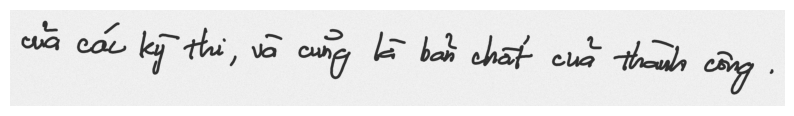

---------------------------------------------------------------------------------------------

Folder: 251 | Image: 1.jpg | CER: 0.00%
✅ Ground-truth: Chương trình hành động thực hiện Nghị quyết trung ương 9 - khóa
🤖 Prediction  : Chương trình hành động thực hiện Nghị quyết trung ương 9 - khóa


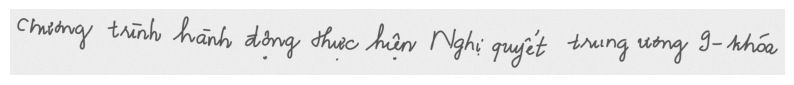

---------------------------------------------------------------------------------------------

Folder: 255 | Image: 19.jpg | CER: 0.00%
✅ Ground-truth: Thành công ấy, liệu có mấy người đạt được?
🤖 Prediction  : Thành công ấy, liệu có mấy người đạt được?


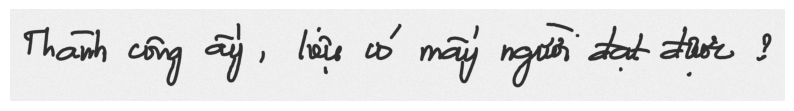

---------------------------------------------------------------------------------------------

Folder: 250 | Image: 25.jpg | CER: 0.00%
✅ Ground-truth: Ngay cả trường hợp ta không qui định, người dân và doanh nghiệp vẫn thực hiện
🤖 Prediction  : Ngay cả trường hợp ta không qui định, người dân và doanh nghiệp vẫn thực hiện


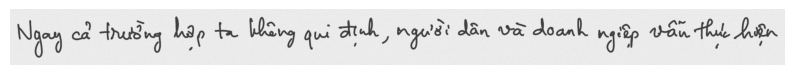

---------------------------------------------------------------------------------------------

Folder: 255 | Image: 14.jpg | CER: 0.00%
✅ Ground-truth: Thành công còn là hình ảnh một cậu bé bị dị tật ở chân, không bao giờ đi lại bình thường
🤖 Prediction  : Thành công còn là hình ảnh một cậu bé bị dị tật ở chân, không bao giờ đi lại bình thường


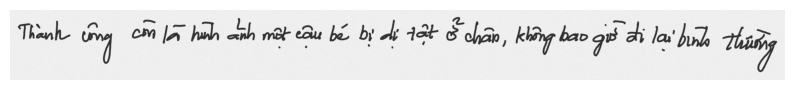

---------------------------------------------------------------------------------------------


In [7]:
# Hiển thị 5 mẫu tốt nhất (CER thấp nhất)
visualize_results(df_results, num_show=5, worst=False)

----- 🚨 Top 5 mẫu tệ nhất (CER cao nhất) -----

Folder: 253 | Image: 13.jpg | CER: 69.23%
✅ Ground-truth: hiệu hiệp sĩ.
🤖 Prediction  : hẹn không rõ.


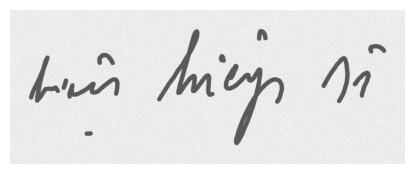

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 32.jpg | CER: 61.33%
✅ Ground-truth: dương nào thiết thực hơn đối với anh Đại và những đồng nghiệp là xử lý ngay
🤖 Prediction  : đường Chi cũ hơn vải anh Đại vứt mâm, đá, nghép, kẹt, sắt, ống, ing,


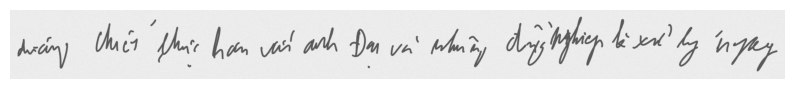

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 34.jpg | CER: 57.97%
✅ Ground-truth: những sai phạm đó. Có như vậy niềm tin vào lẽ phải mới được khôi phục
🤖 Prediction  : những bài làm " đỏ " có như vậy muốn gìn văn " cứ phê trấn " để khẳng định


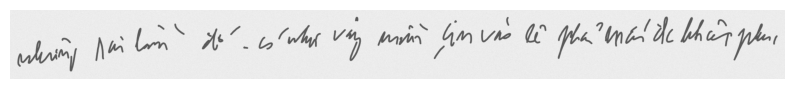

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 26.jpg | CER: 57.38%
✅ Ground-truth: làm xấu đi môi trường đầu tư của thành phố hay không, và cũng
🤖 Prediction  : bán xã / tỉnh mà tuyến đều đều của Châu Phú ở huy không 1 nữ vùng


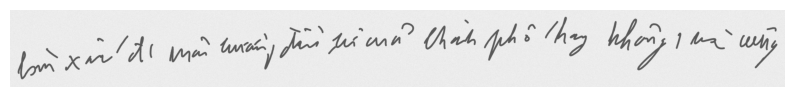

---------------------------------------------------------------------------------------------

Folder: 253 | Image: 42.jpg | CER: 55.71%
✅ Ground-truth: câu hỏi đó tự đến với họ hoặc đến từ người thân, bạn bè đi kèm sự chua
🤖 Prediction  : căn hẳn do lũ cầu " đo hoàn tất " vì người tháng bám bốt dự kiến sẽ chôn


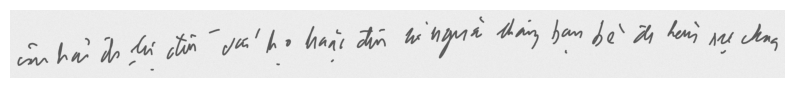

---------------------------------------------------------------------------------------------


In [8]:
# Hiển thị 5 mẫu tệ nhất (CER cao nhất) để phân tích lỗi
visualize_results(df_results, num_show=5, worst=True)